

```
# This is formatted as code
```

# DHV LAB Sheet -6 &7


In [1]:
#Import Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting
%matplotlib inline

Pandas is a python package that deals mostly with :
- **Series**  (1d homogeneous array)
- **DataFrame** (2d labeled heterogeneous array) 
- **Panel** (general 3d array)

### Pandas Series

Pandas *Series* is one-dimentional labeled array containing data of the same type (integers, strings, floating point numbers, Python objects, etc. ). The axis labels are often referred to as *index*.

In [2]:
# Example of creating Pandas series :
s1 = pd.Series( [-3,-1,1,3,5] )
print(s1)

0   -3
1   -1
2    1
3    3
4    5
dtype: int64


We did not pass any index, so by default, it assigned the indexes ranging from 0 to len(data)-1

In [3]:
# View index values
print(s1.index)

RangeIndex(start=0, stop=5, step=1)


In [5]:
s1

0   -3
1   -1
2    1
3    3
4    5
dtype: int64

In [8]:
# Creating Pandas series with index:
s2 = pd.Series( s1, index=['a', 'b', 'c', 'd', 'e'] )
print(s2)

a   NaN
b   NaN
c   NaN
d   NaN
e   NaN
dtype: float64


In [9]:
# View index values
print(s2.index)

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')


In [10]:
# Create a Series from dictionary
data = {'pi': 3.1415, 'e': 2.71828}  # dictionary
print(data)
s3 = pd.Series ( data )
print(s3)

{'pi': 3.1415, 'e': 2.71828}
pi    3.14150
e     2.71828
dtype: float64


In [11]:
# reordering the elements
s4 = pd.Series ( data, index = ['e', 'pi', 'tau'])
print(s4)

e      2.71828
pi     3.14150
tau        NaN
dtype: float64


NAN (non a number) - is used to specify a missing value in Pandas.

In [12]:
s1[:2] # First 2 elements

0   -3
1   -1
dtype: int64

In [ ]:
print( s1[ [2,1,0]])  # Elements out of order

2    1
1   -1
0   -3
dtype: int64


In [ ]:
type(s1)

pandas.core.series.Series

In [ ]:
# Series can be used as a usual one-dimentional array (ndarray):
print("Median:" , s4.median())

Median: 2.9298900000000003


In [ ]:
s1[s1 > 0]

2    1
3    3
4    5
dtype: int64

In [ ]:
# numpy methods can be used on series as usual:
s4[s4 > s4.median()]

pi    3.1415
dtype: float64

#### Attributes and Methods:

|  Attribute/Method | Description |
|-----|-----|
| dtype | data type of values in series |
| empty | True if series is empty |
| size | number of elements |
| values | Returns values as ndarray |
| head() | First n elements |
| tail() | Last n elements |

Execute *dir(s1)* to see all attributes and methods

### Pandas DataFrame

Pandas *DataFrame* is two-dimensional, size-mutable, heterogeneous tabular data structure with labeled rows and columns ( axes ). Can be thought of a dictionary-like container to store python Series objects.

In [13]:
d =  pd.DataFrame({ 'Name': pd.Series(['Alice','Bob','Chris']), 
                  'Age': pd.Series([ 21,25,23]) } )
print(d)

    Name  Age
0  Alice   21
1    Bob   25
2  Chris   23


In [14]:
d2 = pd.DataFrame(np.array([['Alice','Bob','Chris'],[ 21,25,23]]).T, columns=['Name','Age'])

In [15]:
d2

,Name,Age
0,Alice,21
1,Bob,25
2,Chris,23


In [16]:
#Add a new column:
d['height'] = pd.Series([5.2,6.0,5.6])
d

,Name,Age,height
0,Alice,21,5.2
1,Bob,25,6.0
2,Chris,23,5.6


In [17]:
#Read csv file
df = pd.read_csv("Salaries.csv")

Before we can perform any analysis on the data we need to


*   Check if the data were imported correctly
*   Check types of each column
*   How many missing values each column has

We should them carefully prepare the data:

*   Remove columns that we do not need for our analysis
*   Rename columns if necessary
*   Possibly rearrange the columns to make it easier to work with them
*   Create new columns or modify existing (i.g. convert into different units) if necessary






In [ ]:
#Display a few first records
df.head(10)

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800
5,Prof,A,20,20,Male,122400
6,AssocProf,A,20,17,Male,81285
7,Prof,A,18,18,Male,126300
8,Prof,A,29,19,Male,94350
9,Prof,A,51,51,Male,57800


In [18]:
# Display structure of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rank        78 non-null     object
 1   discipline  78 non-null     object
 2   phd         78 non-null     int64 
 3   service     78 non-null     int64 
 4   sex         78 non-null     object
 5   salary      78 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 3.8+ KB


Sometimes the column names in the input file are too long or contain special characters. In these cases to make it easier to work with these columns, we need to rename them.

In [19]:
# Let's create a copy of this dataframe with a new column names
# If we do not want to create a new data frame, we can add inplace=True argument
df_new =df.rename(columns={
        'discipline': 'subject', 
        'sex': 'gender'
    })

In [20]:
df_new

,rank,subject,phd,service,gender,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800
...,...,...,...,...,...,...
73,Prof,B,18,10,Female,105450
74,AssocProf,B,19,6,Female,104542
75,Prof,B,17,17,Female,124312
76,Prof,A,28,14,Female,109954


---
*Exercise* 

In [ ]:
#Display first 10 records
# <your code goes here>

In [ ]:
#Display first 20 records
# <your code goes here>

In [ ]:
#Display the last 5 records
# <your code goes here>

---

### Data Exploration

In [21]:
#Identify the type of df object
type(df)

pandas.core.frame.DataFrame

In [23]:
#List the types of all columns
df.dtypes

rank          object
discipline    object
phd            int64
service        int64
sex           object
salary         int64
dtype: object

In [24]:
#List the column names
df.columns

Index(['rank', 'discipline', 'phd', 'service', 'sex', 'salary'], dtype='object')

In [25]:
#List the row labels and the column names
df.axes

[RangeIndex(start=0, stop=78, step=1),
 Index(['rank', 'discipline', 'phd', 'service', 'sex', 'salary'], dtype='object')]

In [26]:
#Total number of elements in the Data Frame
df.size

468

In [27]:
#Number of rows and columns
df.shape

(78, 6)

In [28]:
#Output basic statistics for the numeric columns
df.describe()

,phd,service,salary
count,78.000000,78.000000,78.000000
mean,19.705128,15.051282,108023.782051
std,12.498425,12.139768,28293.661022
min,1.000000,0.000000,57800.000000
25%,10.250000,5.250000,88612.500000
50%,18.500000,14.500000,104671.000000
75%,27.750000,20.750000,126774.750000
max,56.000000,51.000000,186960.000000


*Get help*   
df.describe?

In [29]:
df.describe?

In [ ]:
# Create a new column
df = df.assign( salary_k = lambda x: x.salary/1000.0)
df.head(10)

,rank,discipline,phd,service,sex,salary,salary_k
0,Prof,B,56,49,Male,186960,186.960
1,Prof,A,12,6,Male,93000,93.000
2,Prof,A,23,20,Male,110515,110.515
3,Prof,A,40,31,Male,131205,131.205
4,Prof,B,20,18,Male,104800,104.800
5,Prof,A,20,20,Male,122400,122.400
6,AssocProf,A,20,17,Male,81285,81.285
7,Prof,A,18,18,Male,126300,126.300
8,Prof,A,29,19,Male,94350,94.350
9,Prof,A,51,51,Male,57800,57.800


In [30]:
# Check how many unique values in a column
df['rank'].unique()

array(['Prof', 'AssocProf', 'AsstProf'], dtype=object)

In [31]:
# Get frequency table for a categorical or binary column
df['rank'].value_counts()

Prof         46
AsstProf     19
AssocProf    13
Name: rank, dtype: int64

In [ ]:
# Get a proportion table
df['rank'].value_counts()/sum(df['rank'].value_counts())

In [33]:
#Alternatively we can use pandas function crosstab()
pd.crosstab(index=df['rank'], columns="count")

col_0,count
rank,
AssocProf,13
AsstProf,19
Prof,46


In [34]:
# Two-way tables
pd.crosstab(index=df['rank'], columns=df['discipline'], margins=True)

discipline,A,B,All
rank,,,
AssocProf,5,8,13
AsstProf,8,11,19
Prof,23,23,46
All,36,42,78


---
### Data slicing and grouping

In [35]:
#Extract a column by name 
df['sex'].head()

0    Male
1    Male
2    Male
3    Male
4    Male
Name: sex, dtype: object

In [36]:
# If the column name does not contain spaces or other special characters and does not collide with data frame methods, we can use a dot notation
df.sex.head()

0    Male
1    Male
2    Male
3    Male
4    Male
Name: sex, dtype: object

In [37]:
# Calculate median number of service years
df.service.median()

14.5

---
*Exercise* 

In [ ]:
# Calculate the basic statistics for the salary column (used describe() method)
# <your code goes here>

In [ ]:
# Calculate how many values in the salary column (use count() method)
# <your code goes here>

In [ ]:
# Calculate the average (mean) salary

---

In [38]:
#Group data using rank
df_rank = df.groupby('rank')

In [39]:
#Calculate mean of all numeric columns for the grouped object
df_rank.mean()

,phd,service,salary
rank,,,
AssocProf,15.076923,11.307692,91786.230769
AsstProf,5.052632,2.210526,81362.789474
Prof,27.065217,21.413043,123624.804348


In [40]:
# Most of the time, the "grouping" object is not stored, but is used as a step in getting a summary:
df.groupby('sex').mean()

,phd,service,salary
sex,,,
Female,16.512821,11.564103,101002.410256
Male,22.897436,18.538462,115045.153846


In [41]:
#Calculate the mean salary for men and women. The following produce Pandas Series (single brackets around salary)
df.groupby('sex')['salary'].mean()

sex
Female    101002.410256
Male      115045.153846
Name: salary, dtype: float64

In [42]:
# If we use double brackets Pandas will produce a DataFrame
df.groupby('sex')[['salary']].mean()

,salary
sex,
Female,101002.410256
Male,115045.153846


In [43]:
# Group using 2 variables - sex and rank:
df.groupby(['rank','sex'], sort=True)[['salary']].mean()

salary
rank      sex                  
AssocProf Female   88512.800000
          Male    102697.666667
AsstProf  Female   78049.909091
          Male     85918.000000
Prof      Female  121967.611111
          Male    124690.142857

---
*Exercise* 

In [ ]:
# Group data by the discipline and find the average salary for each group

---
### Filtering

In [44]:
#Select observation with the value in the salary column > 120K
df_sub = df[ df.salary > 120000]
df_sub.head()

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
3,Prof,A,40,31,Male,131205
5,Prof,A,20,20,Male,122400
7,Prof,A,18,18,Male,126300
10,Prof,B,39,33,Male,128250


In [45]:
df_sub.axes

[Int64Index([ 0,  3,  5,  7, 10, 11, 13, 14, 15, 19, 26, 27, 29, 31, 35, 36, 39,
             40, 44, 45, 49, 51, 58, 72, 75],
            dtype='int64'),
 Index(['rank', 'discipline', 'phd', 'service', 'sex', 'salary'], dtype='object')]

In [46]:
#Select data for female professors
df_w = df[ df.sex == 'Female']
df_w.head()

,rank,discipline,phd,service,sex,salary
39,Prof,B,18,18,Female,129000
40,Prof,A,39,36,Female,137000
41,AssocProf,A,13,8,Female,74830
42,AsstProf,B,4,2,Female,80225
43,AsstProf,B,5,0,Female,77000


In [47]:
# To subset one column using a condition in another columns use method "where"
df.salary.where(df.sex=='Female').dropna().head(6)

39    129000.0
40    137000.0
41     74830.0
42     80225.0
43     77000.0
44    151768.0
Name: salary, dtype: float64

---
*Exercise* 

In [ ]:
# Using filtering, find the mean value of the salary for the discipline A



In [ ]:
# Challange:
# Extract (filter) only observations with high salary ( > 100K) and find how many female and male professors in each group


---
### More on slicing the dataset

In [ ]:
#Select column salary
salary = df['salary']

In [ ]:
#Check data type of the result
type(salary)

pandas.core.series.Series

In [ ]:
#Look at the first few elements of the output
salary.head()

0    186960
1     93000
2    110515
3    131205
4    104800
Name: salary, dtype: int64

In [ ]:
#Select column salary and make the output to be a data frame
df2 = df[['salary']]

In [ ]:
#Check the type
type(df2)

pandas.core.frame.DataFrame

In [ ]:
#Select a subset of rows (based on their position):
# Note 1: The location of the first row is 0
# Note 2: The last value in the range is not included
df[0:10]

,rank,discipline,phd,service,sex,salary,salary_k
0,Prof,B,56,49,Male,186960,186.960
1,Prof,A,12,6,Male,93000,93.000
2,Prof,A,23,20,Male,110515,110.515
3,Prof,A,40,31,Male,131205,131.205
4,Prof,B,20,18,Male,104800,104.800
5,Prof,A,20,20,Male,122400,122.400
6,AssocProf,A,20,17,Male,81285,81.285
7,Prof,A,18,18,Male,126300,126.300
8,Prof,A,29,19,Male,94350,94.350
9,Prof,A,51,51,Male,57800,57.800


In [ ]:
#If we want to select both rows and columns we can use method .loc
df.loc[10:20,['rank', 'sex','salary']]

,rank,sex,salary
10,Prof,Male,128250
11,Prof,Male,134778
12,AsstProf,Male,88000
13,Prof,Male,162200
14,Prof,Male,153750
15,Prof,Male,150480
16,AsstProf,Male,75044
17,AsstProf,Male,92000
18,Prof,Male,107300
19,Prof,Male,150500


In [ ]:
df_sub.head(15)

,rank,discipline,phd,service,sex,salary,salary_k
0,Prof,B,56,49,Male,186960,186.960
3,Prof,A,40,31,Male,131205,131.205
5,Prof,A,20,20,Male,122400,122.400
7,Prof,A,18,18,Male,126300,126.300
10,Prof,B,39,33,Male,128250,128.250
11,Prof,B,23,23,Male,134778,134.778
13,Prof,B,35,33,Male,162200,162.200
14,Prof,B,25,19,Male,153750,153.750
15,Prof,B,17,3,Male,150480,150.480
19,Prof,A,29,27,Male,150500,150.500


In [ ]:
#Let's see what we get for our df_sub data frame
# Method .loc subset the data frame based on the labels:
df_sub.loc[10:20,['rank','sex','salary']]

,rank,sex,salary
10,Prof,Male,128250
11,Prof,Male,134778
13,Prof,Male,162200
14,Prof,Male,153750
15,Prof,Male,150480
19,Prof,Male,150500


In [ ]:
#  Unlike method .loc, method iloc selects rows (and columns) by poistion:
df_sub.iloc[10:20, [0,3,4,5]]

,rank,service,sex,salary
26,Prof,19,Male,148750
27,Prof,43,Male,155865
29,Prof,20,Male,123683
31,Prof,21,Male,155750
35,Prof,23,Male,126933
36,Prof,45,Male,146856
39,Prof,18,Female,129000
40,Prof,36,Female,137000
44,Prof,19,Female,151768
45,Prof,25,Female,140096


### Sorting the Data

In [ ]:
#Sort the data frame by yrs.service and create a new data frame
df_sorted = df.sort_values(by = 'service')
df_sorted.head()

,rank,discipline,phd,service,sex,salary,salary_k
55,AsstProf,A,2,0,Female,72500,72.5
23,AsstProf,A,2,0,Male,85000,85.0
43,AsstProf,B,5,0,Female,77000,77.0
17,AsstProf,B,4,0,Male,92000,92.0
12,AsstProf,B,1,0,Male,88000,88.0


In [ ]:
#Sort the data frame by yrs.service and overwrite the original dataset
df.sort_values(by = 'service', ascending = False, inplace = True)
df.head()

,rank,discipline,phd,service,sex,salary,salary_k
9,Prof,A,51,51,Male,57800,57.800
0,Prof,B,56,49,Male,186960,186.960
36,Prof,B,45,45,Male,146856,146.856
27,Prof,A,45,43,Male,155865,155.865
40,Prof,A,39,36,Female,137000,137.000


In [ ]:
# Restore the original order (by sorting using index)
df.sort_index(axis=0, ascending = True, inplace = True)
df.head()

,rank,discipline,phd,service,sex,salary,salary_k
0,Prof,B,56,49,Male,186960,186.960
1,Prof,A,12,6,Male,93000,93.000
2,Prof,A,23,20,Male,110515,110.515
3,Prof,A,40,31,Male,131205,131.205
4,Prof,B,20,18,Male,104800,104.800


*Exercise* 

In [ ]:
# Sort data frame by the salary (in descending order) and display the first few records of the output (head)


---

In [ ]:
#Sort the data frame using 2 or more columns:
df_sorted = df.sort_values(by = ['service', 'salary'], ascending = [True,False])
df_sorted.head(10)

,rank,discipline,phd,service,sex,salary,salary_k
52,Prof,A,12,0,Female,105000,105.000
17,AsstProf,B,4,0,Male,92000,92.000
12,AsstProf,B,1,0,Male,88000,88.000
23,AsstProf,A,2,0,Male,85000,85.000
43,AsstProf,B,5,0,Female,77000,77.000
55,AsstProf,A,2,0,Female,72500,72.500
57,AsstProf,A,3,1,Female,72500,72.500
28,AsstProf,B,7,2,Male,91300,91.300
42,AsstProf,B,4,2,Female,80225,80.225
68,AsstProf,A,4,2,Female,77500,77.500


### Explore data using graphics

In [48]:
#Show graphs withint Python notebook
%matplotlib inline

(array([7.14677085e-06, 8.73494215e-06, 1.74698843e-05, 8.73494215e-06,
        9.52902780e-06, 6.35268520e-06, 3.17634260e-06, 7.94085650e-07]),
 array([ 57800.,  73945.,  90090., 106235., 122380., 138525., 154670.,
        170815., 186960.]),
 <a list of 8 Patch objects>)

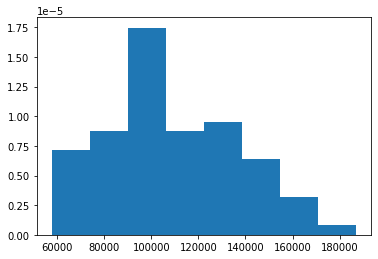

In [49]:
#Use matplotlib to draw a histogram of a salary data
plt.hist(df['salary'],bins=8, density=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


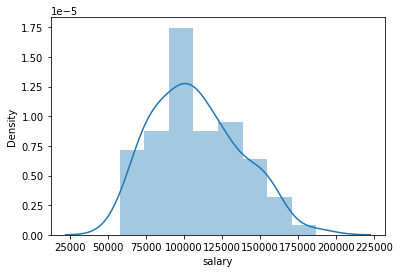

In [ ]:
#Use seaborn package to draw a histogram
sns.distplot(df['salary']);

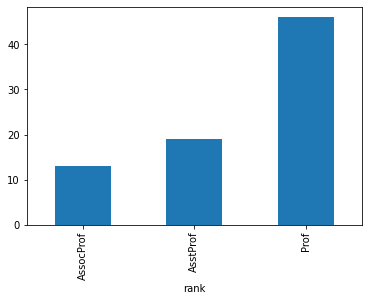

In [ ]:
# Use regular matplotlib function to display a barplot
df.groupby(['rank'])['salary'].count().plot(kind='bar')

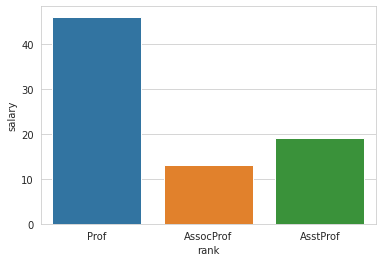

In [ ]:
# Use seaborn package to display a barplot
sns.set_style("whitegrid")

ax = sns.barplot(x='rank',y ='salary', data=df, estimator=len)

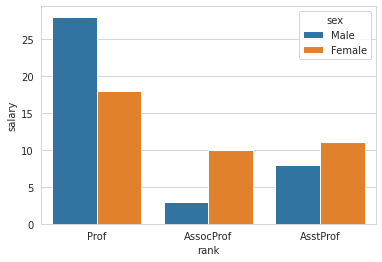

In [ ]:
# Split into 2 groups:
ax = sns.barplot(x='rank',y ='salary', hue='sex', data=df, estimator=len)

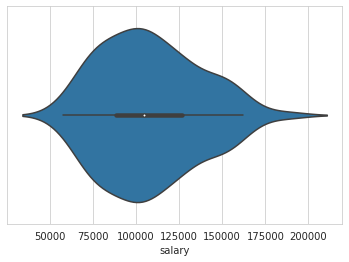

In [ ]:
#Violinplot
sns.violinplot(x = "salary", data=df)

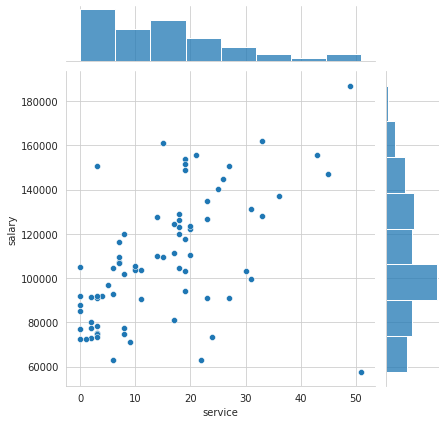

In [ ]:
#Scatterplot in seaborn
sns.jointplot(x='service', y='salary', data=df)

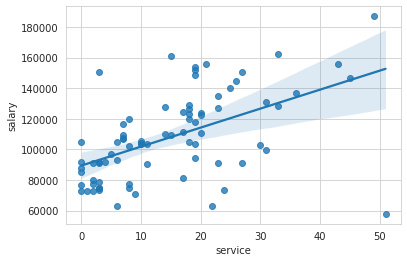

In [ ]:
#If we are interested in linear regression plot for 2 numeric variables we can use regplot
sns.regplot(x='service', y='salary', data=df)

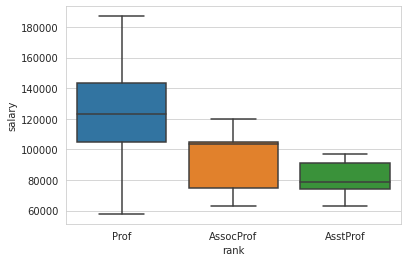

In [ ]:
# box plot
sns.boxplot(x='rank',y='salary', data=df)

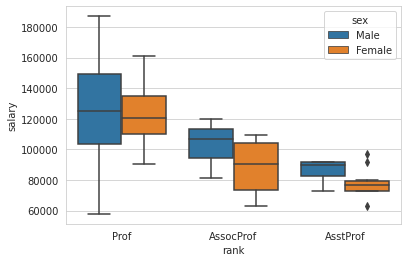

In [ ]:
# side-by-side box plot
sns.boxplot(x='rank',y='salary', data=df, hue='sex')

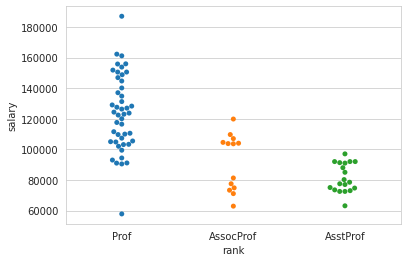

In [ ]:
# swarm plot
sns.swarmplot(x='rank',y='salary', data=df)

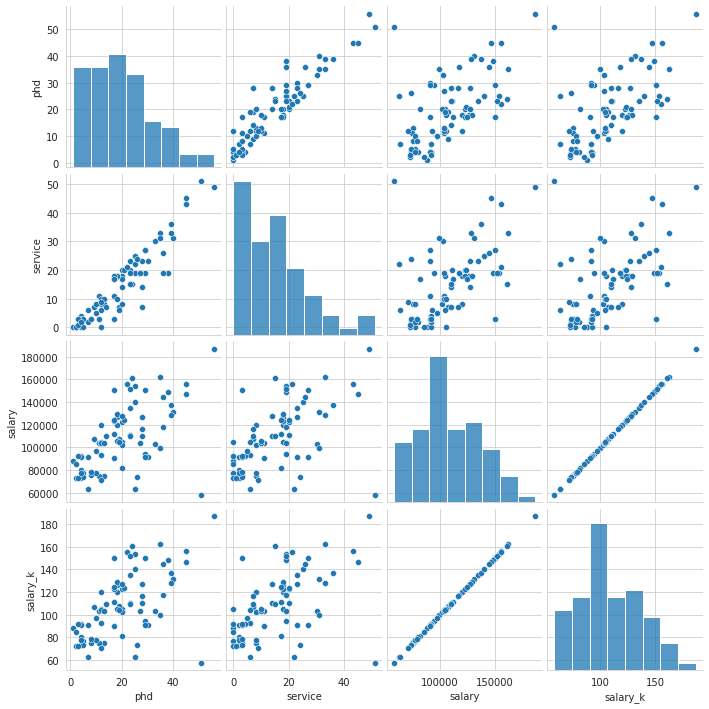

In [ ]:
# Pairplot 
sns.pairplot(df)